GPU BENCH-MARKING

In [7]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.experimental.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.10.0


In [8]:
#Check whether the GPU is built with CUDA
tf.test.is_built_with_cuda()

False

In [9]:
tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 23s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_train[0].shape

(32, 32, 3)

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [23]:
def plot_sample(index):
    plt.figure(figsize = (8,2))
    plt.imshow(X_train[index])

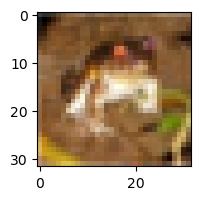

In [25]:
plot_sample(0)

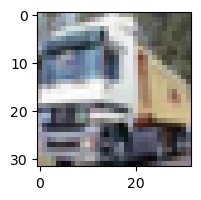

In [26]:
plot_sample(1)

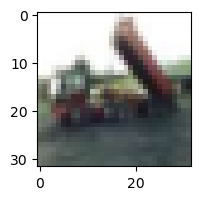

In [27]:
plot_sample(2)

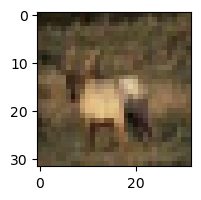

In [28]:
plot_sample(3)

In [29]:
y_train[3]

array([4], dtype=uint8)

In [32]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [34]:
classes[y_train[3][0]]

'deer'

Standard Scaling.

We are scaling down the values to improve the performance of the model.

RGB values range between 0 and 255.

In [35]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [36]:
X_train_scaled.shape

(50000, 32, 32, 3)

ONE HOT ENCODING IN TENSORFLOW

In [37]:
y_train_categorical = keras.utils.to_categorical(
y_train, num_classes = 10, dtype='float32')

In [38]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
y_test_categorical = keras.utils.to_categorical(
y_test, num_classes = 10, dtype='float32')

In [40]:
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'SGD',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs = 50)

2022-12-06 14:35:10.590898: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 14:35:10.592081: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Epoch 1/50


2022-12-06 14:35:12.061617: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-06 14:35:12.233738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 20s 12ms/step - loss: 1.8124 - accuracy: 0.3540
Epoch 2/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6219 - accuracy: 0.4259
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5412 - accuracy: 0.4574
Epoch 4/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4842 - accuracy: 0.4776
Epoch 5/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4329 - accuracy: 0.4945
Epoch 6/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3896 - accuracy: 0.5106
Epoch 7/50
1563/1563 [==============================] - 20s 12ms/step - loss: 1.3522 - accuracy: 0.5227
Epoch 8/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3170 - accuracy: 0.5365
Epoch 9/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2837 - accuracy: 0.5477
Epoch 10/50
1563/1563 [==============================] - 19s 12ms/step - lo

Categorical cross entropy loss has been used in this case because we have one hot encoded all the class labels. The target column is continuous.

Sparse Categorical cross entropy is implemented when we have all the multiclass labels present in the target column. The target column has a single value in discrete form.

In [42]:
model.predict(X_test_scaled)[0]

 30/313 [=>............................] - ETA: 1s

2022-12-06 15:09:50.495229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step


array([3.8372245e-01, 2.3348418e-01, 7.0588732e-01, 9.9945968e-01,
       9.9647450e-01, 9.2891914e-01, 3.4023441e-02, 4.0400040e-04,
       9.1033751e-01, 1.3225822e-01], dtype=float32)

In [43]:
classes[y_test[0][0]]

'cat'

In [44]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 2s 7ms/step


3

In [45]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 2s 7ms/step


'cat'

In [46]:
classes[y_test[1][0]]

'ship'

In [47]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 2s 7ms/step


'ship'

In [48]:
def plot_sample(index):
    plt.figure(figsize = (8,2))
    plt.imshow(X_test[index])

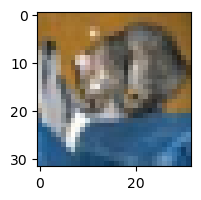

In [50]:
plot_sample(0)

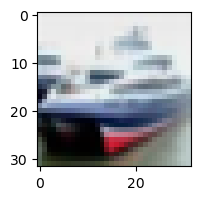

In [51]:
plot_sample(1)

In [52]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation = 'relu'),
        keras.layers.Dense(1000, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ])

    model.compile(optimizer = 'SGD',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    return model

In [56]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.8114 - accuracy: 0.3564
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6232 - accuracy: 0.4268
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5412 - accuracy: 0.4567
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4808 - accuracy: 0.4805
Epoch 5/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4317 - accuracy: 0.4971
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3887 - accuracy: 0.5124
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3496 - accuracy: 0.5265
Epoch 8/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3145 - accuracy: 0.5392
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2845 - accuracy: 0.5488
Epoch 10/10
1563/1563 [==============================] - 26s 17m

In [55]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train_scaled, y_train_categorical, epochs = 10)

Epoch 1/10
   9/1563 [..............................] - ETA: 21s - loss: 2.3602 - accuracy: 0.1215

2022-12-06 15:22:25.088241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 20s 12ms/step - loss: 1.8115 - accuracy: 0.3558
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6216 - accuracy: 0.4276
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5411 - accuracy: 0.4575
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4826 - accuracy: 0.4781
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4336 - accuracy: 0.4951
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3892 - accuracy: 0.5110
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3520 - accuracy: 0.5240
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3167 - accuracy: 0.5405
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2853 - accuracy: 0.5479
Epoch 10/10
1563/1563 [==============================] - 20s 12ms/step - lo